<a href="https://colab.research.google.com/github/antonypaulson/My-own-ML-Algorithms/blob/master/Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing the libraries
import numpy as np
import pandas as pd

In [0]:
#Import the data
data = pd.read_csv('ex2data1.txt',header=None, names =["X1","X2", "y"])

In [0]:
data.isnull().sum()

X1    0
X2    0
y     0
dtype: int64

In [0]:
#Create separate lists
X1 = data['X1']
X2 = data['X2']
y = data['y']

In [0]:
#convert into arrays
X1 = np.array(X1).reshape(len(X1),1)
X2 = np.array(X2).reshape(len(X2),1)
y = np.array(y).reshape(len(y),1)

#for sklearn
a = np.c_[X1,X2]
b = y

In [0]:
X1 = (X1 -np.mean(X1))/np.std(X1)
X2 = (X2 -np.mean(X2))/np.std(X2)

In [0]:
#creating ones
x_= np.ones(len(X))

In [0]:
#Concatenate ones to the large X to create two columns
X = np.c_[x_,X1,X2]

In [0]:
import math
#Creating the cost function
theta = [[0],
         [0],
        [0]]
def sig(a):
  sigmoid = 1/(1+np.exp(-a))
  return sigmoid
def costfunction(X,y,theta):
  h = np.dot(X,theta)
  h_logistic = sig(h)
  m = len(X)
  part1 = np.dot(np.log(h_logistic).T, y)
  part2 = np.dot(np.log(1- h_logistic).T,(1-y))
  allparts = part1 + part2
  allparts_sum = allparts/m
  J = -1*allparts_sum
  #J = -(np.sum(np.dot(y,np.log(h_logistic))+ np.dot(1-y,np.log(1-h_logistic))))/m #cost function
  return J[0]

In [0]:
#Compute the cost function
costfunction(X,y,theta)

array([0.69314718])

In [0]:
#Lets run gradient descent
def gradientdescent(X,y,theta,alpha=0.00001,steps=10000):
  m = len(X)
  transpos = X.T
  cost =[]
  for i in range(steps):
    h = np.dot(X,theta)
    grad_part1 = np.dot(X.T,(sig(h)-y))
    grad_part2 = alpha * (grad_part1)*1/m
    theta = theta - grad_part2
    #theta = theta - alpha*(1/m)*(np.dot(transpos,(sig(h)-y)))
    cost.append(costfunction(X,y,theta))
  return theta, cost

In [0]:
#for i in range()
result, cost =gradientdescent(X,y,theta,alpha)

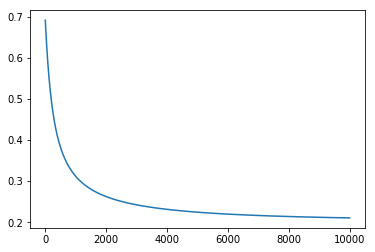

In [0]:
cost = [x for x in cost if str(x) != 'nan']
plt.plot(cost)

In [0]:
result

array([[1.27071379],
       [3.04735849],
       [2.81165934]])

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(a,b)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
print(lr.intercept_)
print(lr.coef_)


[0.89684257]
[[2.23646845 2.04111273]]


In [0]:
#predicting the results from our model

def predict(theta, X, threshold =0.5):
  p = sig(X.dot(theta.T)) >= threshold
  return (p.astype('int'))

In [0]:
pred = predict(result.T,X)

In [0]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, pred))

0.89
